In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
path = r"C:\Users\NOAH ESE\Documents\python aileadtech data\Reg_Assignment\Concrete_Data.xls"

#write a function that loads, splits, and normalizes the data

def data_processing(path, target_col):
    #load the data
    concrete = pd.read_excel(path)
    concrete.rename(columns = {'Concrete compressive strength(MPa, megapascals) ': "CCS"},inplace=True)

    #select the features and target from the data
    features = concrete.drop([target_col], axis = 1).values
    target = concrete[target_col].values
    #split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(features, target, random_state = 0)
    #instantiate the scaler
    scaler = MinMaxScaler()
    #normalize the data
    x_train_std = scaler.fit_transform(x_train)
    x_test_std = scaler.transform(x_test)
    return x_train_std, x_test_std, y_train, y_test


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#build a generalized model
def gen_model(model_name, path, target_col):
    #get the normalized data
    x_tr, x_tst, y_tr, y_tst = data_processing(path, target_col)
    #instantiate the model
    lm = model_name
    #train the model
    lm.fit(x_tr, y_tr)
    
    print("Training Accuracy: {:.4f}".format(lm.score(x_tr,y_tr)))
    print("Testing Accuracy: {:.4f}".format(lm.score(x_tst,y_tst)))
    


In [5]:
gen_model(LinearRegression(), path,  "CCS")

Training Accuracy: 0.6108
Testing Accuracy: 0.6234


In [4]:
gen_model(Ridge(), path, "CCS")

Training Accuracy: 0.6075
Testing Accuracy: 0.6246


In [10]:
gen_model(Lasso(), path, "CCS")

Training Accuracy: 0.1946
Testing Accuracy: 0.2093


In [11]:
#The linear regression and ridge regression models generalize, while the lasso regression model overfits.

In [12]:
import matplotlib.pyplot as plt
#Build a genaralized regularization model
def gen_reg_model(model_name, path, target_col):
    #create a list of alpha values for regularization
    alpha_values = [1,1.5,2,2.5,3,3.5,4,4.5,5,7,9,11,15,20]
    #create empty lists for training and testing accuracy across alpha levels
    train_acc = []
    test_acc = []
    #get the normalized data
    x_tr, x_tst, y_tr, y_tst = data_processing(path, target_col)
    #create a for loop to run through the alpha values
    for alp in alpha_values:
        #instantiate the model with the corresponding alpha value
        model = model_name(alpha = alp)
        model.fit(x_tr, y_tr)
        train_acc.append(model.score(x_tr, y_tr))
        test_acc.append(model.score(x_tst, y_tst))
        
    
    #display visualization
    plt.plot(alpha_values, train_acc, label = "Training Accuracy")
    plt.plot(alpha_values, test_acc, label = "Test Accuracy")
    plt.legend(loc = "best")
    plt.show()
    

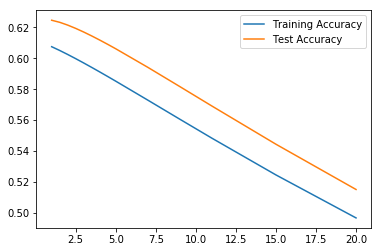

In [13]:
gen_reg_model(Ridge, path, "CCS")

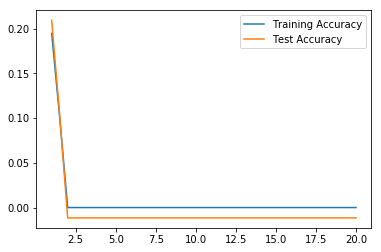

In [14]:
gen_reg_model(Lasso, path, "CCS")

In [15]:
#The model still underfits with lasso regression, more data should be gotten to obtain better accuracy levels.